In [82]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [83]:
image = cv2.imread('sar_2_color.jpg')

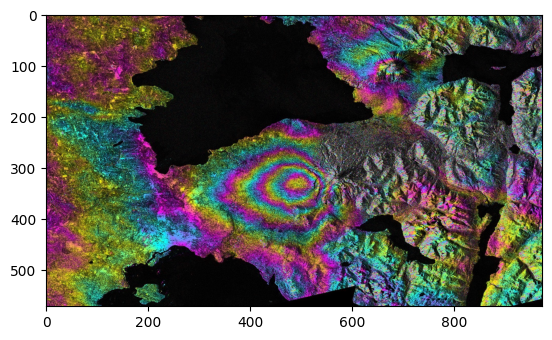

In [84]:
plt.imshow(image)

In [85]:
image.shape # h,w,c

(572, 974, 3)

In [86]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [87]:
# ROI
img_roi = image[100:200, 500:700]

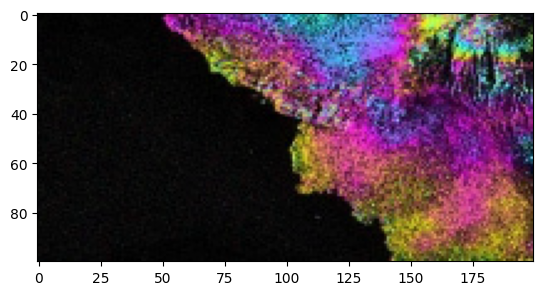

In [88]:
plt.imshow(img_roi)

In [89]:
b,g,r = cv2.split(image)

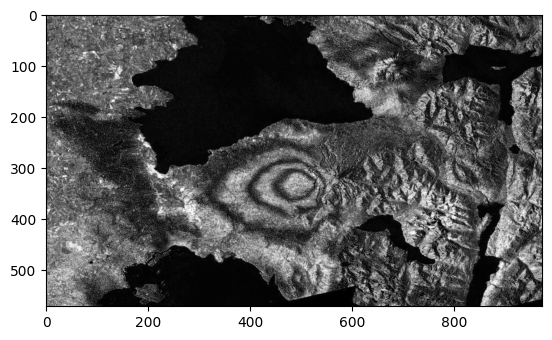

In [90]:
plt.imshow(b, cmap = 'gray')

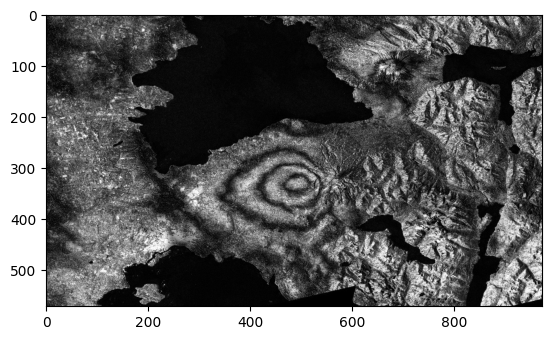

In [91]:
plt.imshow(g, cmap = 'gray')

In [92]:
# alternative approach
b = image[:,:,0]

In [93]:
import copy

image2 = copy.deepcopy(image)

In [94]:
image2[50:100,50:100] = [0,0,0]

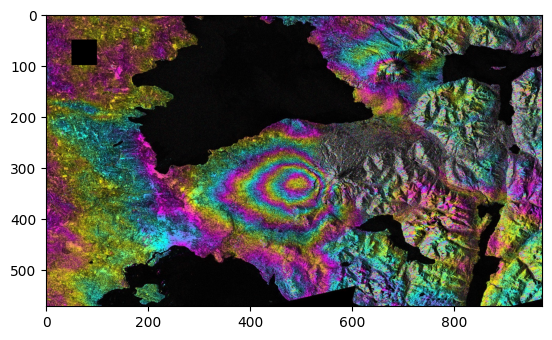

In [95]:
plt.imshow(image2)

In [96]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

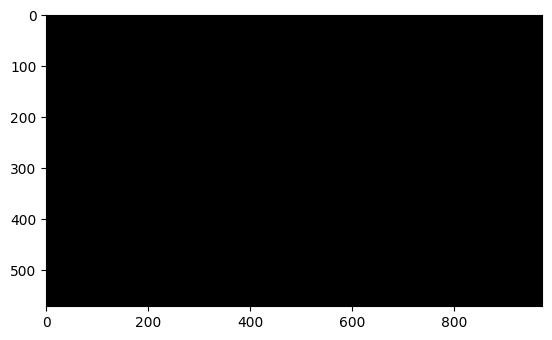

In [97]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [98]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [99]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [100]:
image_gray[0,0]

40

In [101]:
image_gray.shape

(572, 974)

In [102]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [103]:
image_hsv.shape

(572, 974, 3)

In [104]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [105]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [106]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [107]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [108]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

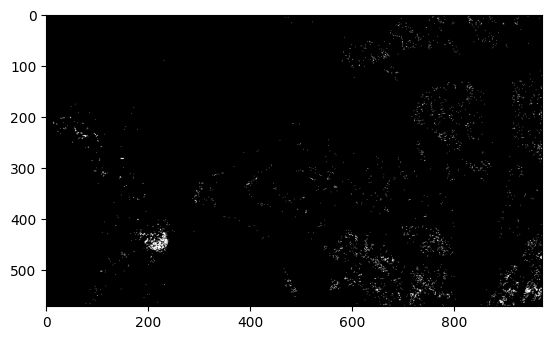

In [109]:
plt.imshow(thresh1, cmap='gray')

In [110]:
thresh1[thresh1==100].sum()

0

# Построение гистограммы

In [111]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

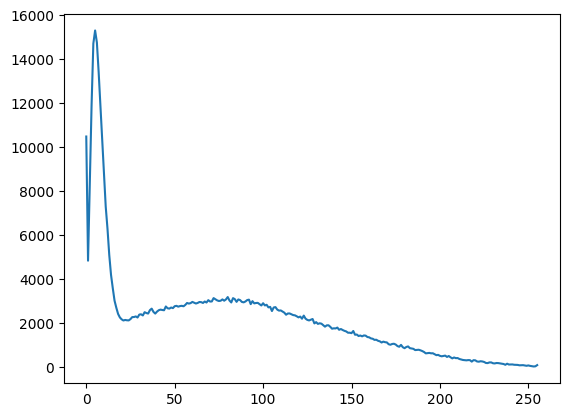

In [112]:
plt.plot(b_hist)

In [113]:
b_hist_cum = b_hist.cumsum()

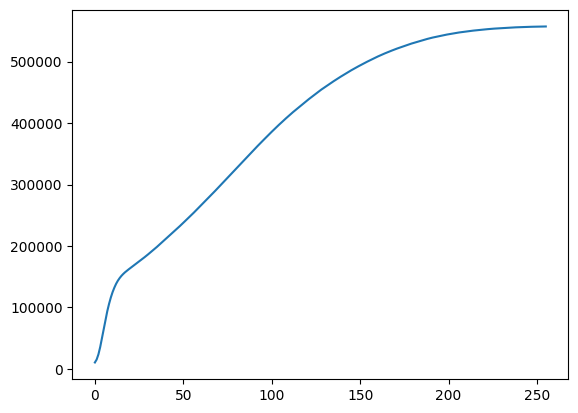

In [114]:
plt.plot(b_hist_cum)

In [115]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

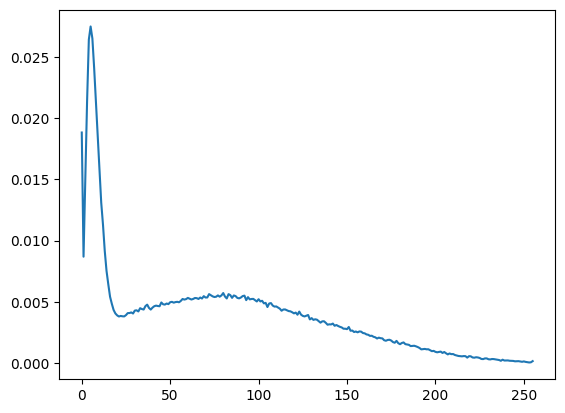

In [116]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [117]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


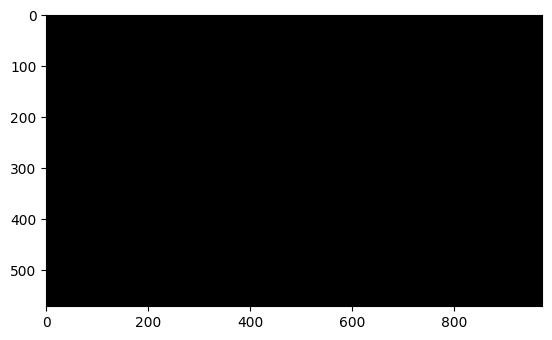

In [118]:
plt.imshow(diff)

In [119]:
mse = mean_squared_error(image_gray, image_gray)
mse

0.0

# Статистические характеристики изображений

In [120]:
mean = image_gray.mean()

In [121]:
std = image_gray.std()

In [122]:
print(mean,std)

67.41225535245043 52.016191875959635


In [123]:
eq_gray = cv2.equalizeHist(image_gray)

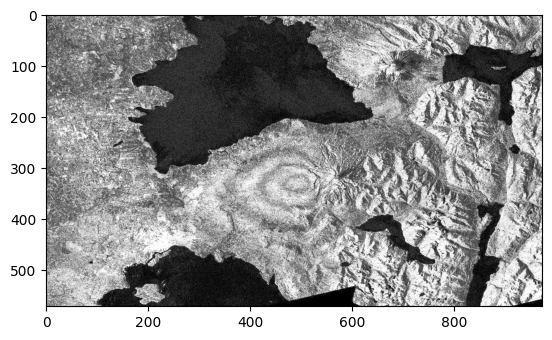

In [124]:
plt.imshow(eq_gray, cmap="gray")


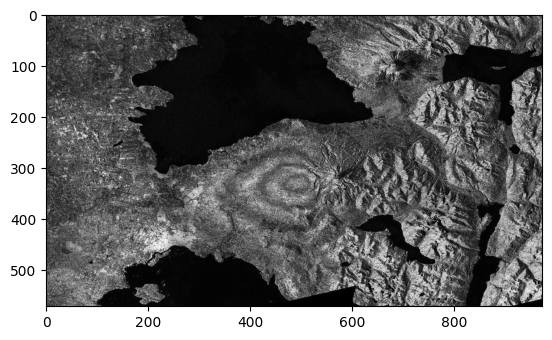

In [125]:
plt.imshow(image_gray, cmap="gray")

In [126]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


In [127]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

plt.set_cmap("gray")

<Figure size 640x480 with 0 Axes>

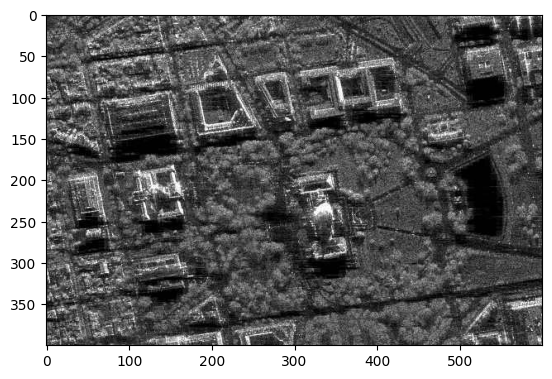

In [128]:
gray_image = cv2.imread("./sar_1_gray.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_image)

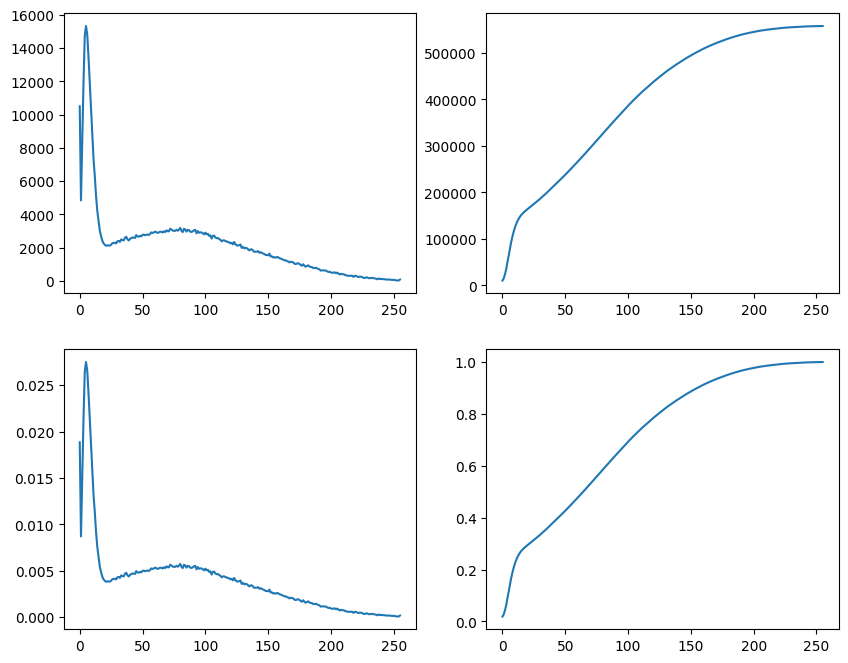

In [129]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)
b_hist_cum = b_hist.cumsum()
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])
b_hist_norm_cum = b_hist_norm.cumsum()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))
axes[0, 0].plot(b_hist)
axes[0, 1].plot(b_hist_cum)
axes[1, 0].plot(b_hist_norm)
axes[1, 1].plot(b_hist_norm_cum)

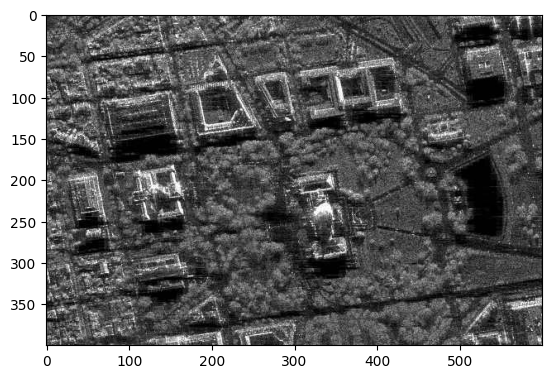

In [148]:
plt.imshow((gray_image/255)*1.5*255)

Text(0.5, 1.0, 'Gamma = 1.5')

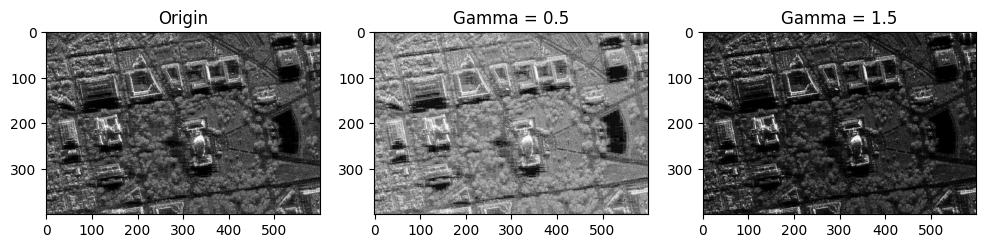

In [158]:
def adjust_gamma(image, gamma=1.0):
	table = np.array([((i / 255.0) ** gamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	return cv2.LUT(image, table)

gamma_img_1 = adjust_gamma(gray_image, 0.5)
gamma_img_2 = adjust_gamma(gray_image, 1.5)
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 10))
axes[0].imshow(gray_image)
axes[1].imshow(gamma_img_1)
axes[2].imshow(gamma_img_2)
axes[0].set_title("Origin")
axes[1].set_title("Gamma = 0.5")
axes[2].set_title("Gamma = 1.5")

In [159]:
ssim_1, _ = structural_similarity(gray_image, gamma_img_1, full=True)
mse_1 = mean_squared_error(gray_image, gamma_img_1)
ssim_2, _ = structural_similarity(gray_image, gamma_img_2, full=True)
mse_2 = mean_squared_error(gray_image, gamma_img_2)

print(f"For Gamma=0.5:\n{ssim_1=}\n{mse_1=}\n")
print(f"For Gamma=1.5:\n{ssim_2=}\n{mse_2=}")

For Gamma=0.5:
ssim_1=0.7875008686792753
mse_1=3250.429145833333

For Gamma=1.5:
ssim_2=0.8065788107754002
mse_2=971.8206541666667


Text(0.5, 1.0, 'Statistical color correction')

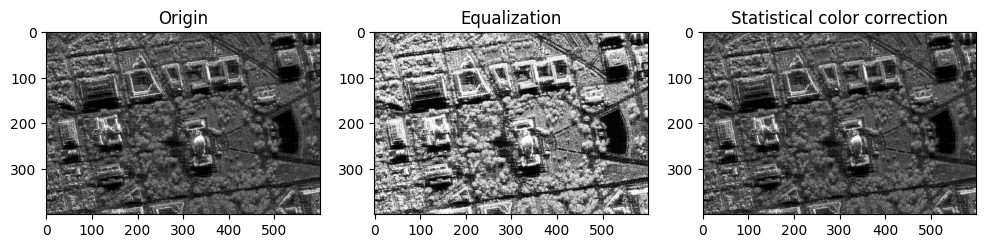

In [160]:
eq_gray_image = cv2.equalizeHist(gray_image)
statistic_gray_image = eq_gray_image.mean() + (gray_image-gray_image.mean())*eq_gray_image.std()/gray_image.std()

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 10))
axes[0].imshow(gray_image)
axes[1].imshow(eq_gray_image)
axes[2].imshow(statistic_gray_image)
axes[0].set_title("Origin")
axes[1].set_title("Equalization")
axes[2].set_title("Statistical color correction")

Text(0.5, 1.0, 'Threshold to zero')

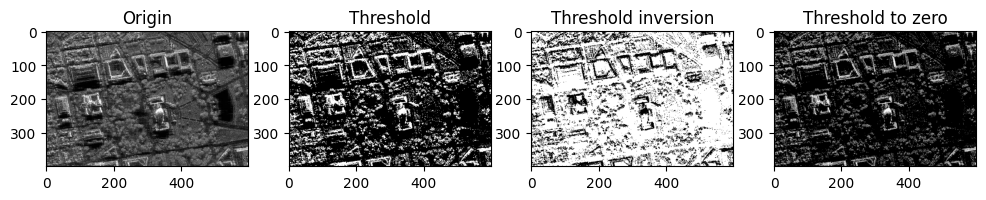

In [161]:
_, thresh1 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_TOZERO)

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(12, 10))
axes[0].imshow(gray_image)
axes[1].imshow(thresh1)
axes[2].imshow(thresh2)
axes[3].imshow(thresh3)
axes[0].set_title("Origin")
axes[1].set_title("Threshold")
axes[2].set_title("Threshold inversion")
axes[3].set_title("Threshold to zero")